In [1]:
import numpy as np
import pandas as pd

A = pd.read_csv("./anonymisedData/assessments.csv")
B = pd.read_csv("./anonymisedData/courses.csv")
C = pd.read_csv("./anonymisedData/studentAssessment.csv")
D = pd.read_csv("./anonymisedData/studentInfo.csv")
E = pd.read_csv("./anonymisedData/studentRegistration.csv")
F = pd.read_csv("./anonymisedData/studentVle.csv")
G = pd.read_csv("./anonymisedData/vle.csv")

A.head()


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [2]:
A.describe(include='all')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
count,206,206,206.000000,206,195.000000,206.000000
unique,7,4,NaN,3,NaN,NaN
top,FFF,2014J,NaN,TMA,NaN,NaN
freq,52,57,NaN,106,NaN,NaN
mean,NaN,NaN,26473.975728,NaN,145.005128,20.873786
std,NaN,NaN,10098.625521,NaN,76.001119,30.384224
min,NaN,NaN,1752.000000,NaN,12.000000,0.000000
25%,NaN,NaN,15023.250000,NaN,71.000000,0.000000
50%,NaN,NaN,25364.500000,NaN,152.000000,12.500000
75%,NaN,NaN,34891.750000,NaN,222.000000,24.250000


In [3]:
A.nunique()
# id_assessment se moze smatrati monotonim atributom ali ga nisam micala jer je isto tako i jedini identifikator te buduci da su csv
# file-ovi medusobno ispretpleteni ne zelim izgubit podatke odnosno veze izmedu file-ova

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

In [4]:
A.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [5]:
A.loc[A['date'] == '', 'date'] = pd.NA
AB = pd.merge(A, B, on=['code_module', 'code_presentation'], how='left')
AB.loc[(AB['date'].isna()) & (AB['assessment_type'] == 'Exam'), 'date'] = AB['module_presentation_length']
AB.head(10)
A = AB[A.columns]
A.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,268.0,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [6]:
B.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [7]:
B.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [8]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [9]:
A.loc[:, 'date'] = A['date'].astype(float).astype(int)
A.describe()

,id_assessment,date,weight
count,206.000000,206.000000,206.000000
mean,26473.975728,150.966019,20.873786
std,10098.625521,78.161395,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,81.250000,0.000000
50%,25364.500000,159.000000,12.500000
75%,34891.750000,227.000000,24.250000
max,40088.000000,269.000000,100.000000


In [10]:
C.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [11]:
C.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

In [12]:
C.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [13]:
C['score'].replace('', 0, inplace=True)
C['score'] = C['score'].fillna(0)
C['score'] = C['score'].astype(float)
#rezultat ocjenjivanja nije pohranjen u sustavu (zavrsni ispit nedostaje)

In [14]:
C.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [15]:
C.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.724171
std,8829.784254,5.523952e+05,71.484148,0.104194,18.940093
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [16]:
min_date = C['date_submitted'].min()
row_with_min_date =C[C['date_submitted'] == min_date]
print(row_with_min_date)

       id_assessment  id_student  date_submitted  is_banked  score
28783          15008      559381             -11          0   63.0


In [17]:
print('date_submited = -1: ', ((C.date_submitted == -1) & (C.is_banked == 1)).sum())

date_submited = -1:  1909


In [18]:
print('date submited = ?: ', ((C.date_submitted != -1) & (C.is_banked == 1)).sum())

date submited = ?:  0


In [19]:
print('date submited = ?: ', ((C.date_submitted < -1) & (C.is_banked == 0)).sum())

date submited = ?:  130


In [20]:
average_date_submitted = C[C['date_submitted'] >= 0]['date_submitted'].mean()
average_date_submitted_int = int(round(average_date_submitted))
C.loc[C['date_submitted'] < 0, 'date_submitted'] = average_date_submitted_int
C['date_submitted'] = C['date_submitted'].astype(int)
#ako je datum predaje negativan zamjenimo ga s prosjecnom vrijednosti

In [21]:
C.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,117.431575,0.010977,75.724171
std,8829.784254,5.523952e+05,70.323030,0.104194,18.940093
min,1752.000000,6.516000e+03,0.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,52.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,117.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [22]:
max_dates_dict = pd.Series(A.date.values, index=A.id_assessment).to_dict()

#provjera je li date_submitted unutar oeckivanog raspona
#dodaj novi stupac (boolean) koji odreduje jel zadatak predan na vrijeme
def is_date_within_expected(row):
    max_date = max_dates_dict.get(row['id_assessment'], None)
    if max_date is not None:
        return row['date_submitted'] <= max_date
    return False  
C['is_within_expected_date'] = C.apply(is_date_within_expected, axis=1)

In [23]:
C.head()

,id_assessment,id_student,date_submitted,is_banked,score,is_within_expected_date
0,1752,11391,18,0,78.0,True
1,1752,28400,22,0,70.0,False
2,1752,31604,17,0,72.0,True
3,1752,32885,26,0,69.0,False
4,1752,38053,19,0,79.0,True


In [24]:
D.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [25]:
D.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [26]:
D['imd_band'].replace('', np.nan, inplace=True)

In [27]:
from sklearn.impute import SimpleImputer
D.replace('nan', np.nan, inplace=True)
imputer = SimpleImputer(strategy='most_frequent')
D['imd_band'] = imputer.fit_transform(D[['imd_band']])[:, 0]

smth = D[D['id_student'] == 53025]
print(smth)
#zamjeniti nan vrij. sa najcescom vrij.

  code_module code_presentation  id_student gender        region  \
9         AAA             2013J       53025      M  North Region   

             highest_education imd_band age_band  num_of_prev_attempts  \
9  Post Graduate Qualification   20-30%     55<=                     0   

   studied_credits disability final_result  
9               60          N         Pass  


In [28]:
D['imd_band'] = D['imd_band'].replace('10-20', '10-20%')

In [29]:
D.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [30]:
D.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [31]:
E.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

In [32]:
E.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [33]:
missing_registration_students = E[E['date_registration'].isna()]['id_student'].unique()

C.drop(C[C['id_student'].isin(missing_registration_students)].index, inplace=True)
D.drop(D[D['id_student'].isin(missing_registration_students)].index, inplace=True)
F.drop(F[F['id_student'].isin(missing_registration_students)].index, inplace=True)
E.drop(E[E['id_student'].isin(missing_registration_students)].index, inplace=True)
#studenti koji nemaju zabiljezen datum registracije su izbrisani jer ih je jako malo (0.16%)

In [34]:
E.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration          0
date_unregistration    22509
dtype: int64

In [35]:
E['dropped_out'] = ~E['date_unregistration'].isna()
E.describe()

,id_student,date_registration,date_unregistration
count,3.253300e+04,32533.000000,10024.000000
mean,7.061736e+05,-69.394922,50.313448
std,5.483846e+05,49.255643,82.002264
min,3.733000e+03,-322.000000,-317.000000
25%,5.085170e+05,-100.000000,-1.000000
50%,5.902410e+05,-57.000000,29.000000
75%,6.443840e+05,-29.000000,109.000000
max,2.698591e+06,167.000000,444.000000


In [36]:
E.head(10)

,code_module,code_presentation,id_student,date_registration,date_unregistration,dropped_out
0,AAA,2013J,11391,-159.0,NaN,False
1,AAA,2013J,28400,-53.0,NaN,False
2,AAA,2013J,30268,-92.0,12.0,True
3,AAA,2013J,31604,-52.0,NaN,False
4,AAA,2013J,32885,-176.0,NaN,False
5,AAA,2013J,38053,-110.0,NaN,False
6,AAA,2013J,45462,-67.0,NaN,False
7,AAA,2013J,45642,-29.0,NaN,False
8,AAA,2013J,52130,-33.0,NaN,False
9,AAA,2013J,53025,-179.0,NaN,False


In [37]:
F.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [38]:
pd.set_option('display.float_format', '{:.2f}'.format)
F.describe()

,id_student,id_site,date,sum_click
count,10652127.00,10652127.00,10652127.00,10652127.00
mean,733355.03,738341.47,95.18,3.72
std,582704.93,131214.12,76.07,8.85
min,6516.00,526721.00,-25.00,1.00
25%,507743.00,673519.00,25.00,1.00
50%,588240.00,730069.00,86.00,2.00
75%,646489.00,877030.00,156.00,3.00
max,2698588.00,1049562.00,269.00,6977.00


In [39]:
row = F[F['sum_click'] > 3000]
print(row)

        code_module code_presentation  id_student  id_site  date  sum_click
3907683         DDD             2013J      204505   673519    43       6977
4482533         DDD             2014B      620337   773028    35       3958
5072596         DDD             2014J      592214   814061   121       4953
5469679         EEE             2013J      601224   551135    87       4523
6331815         FFF             2013B      497180   526721     1       4098
6931847         FFF             2013B      543643   526853   140       3725


In [40]:
F.drop(F[F['sum_click'] > 1000].index, inplace=True)
#strsece vrijednosti

In [41]:
F.describe()

,id_student,id_site,date,sum_click
count,10652104.00,10652104.00,10652104.00,10652104.00
mean,733355.13,738341.42,95.18,3.71
std,582705.06,131214.10,76.07,7.77
min,6516.00,526721.00,-25.00,1.00
25%,507743.00,673519.00,25.00,1.00
50%,588240.00,730069.00,86.00,2.00
75%,646489.00,877030.00,156.00,3.00
max,2698588.00,1049562.00,269.00,998.00


In [42]:
G.nunique()

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

In [43]:
G.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [44]:
G.drop('week_from', axis=1, inplace=True)
G.drop('week_to', axis=1, inplace=True)
#nebitno

In [45]:
A.to_csv('assessments_clean.csv', index=False)
B.to_csv('courses_clean.csv', index=False)
C.to_csv('studentAssessment_clean.csv', index=False)
D.to_csv('studentInfo_clean.csv', index=False)
E.to_csv('studentRegistration_clean.csv', index=False)
F.to_csv('studentVle_clean.csv', index=False)
G.to_csv('vle_clean.csv', index=False)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

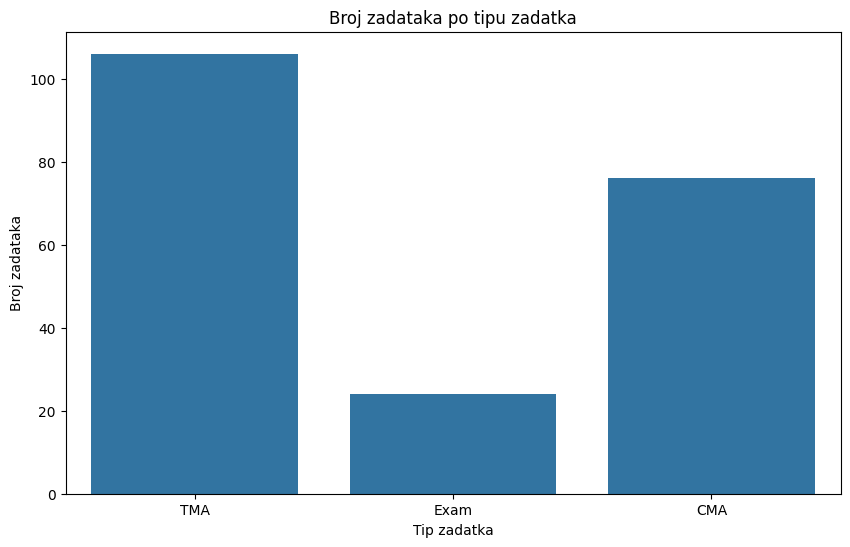

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=A, x='assessment_type')
plt.title('Broj zadataka po tipu zadatka')
plt.xlabel('Tip zadatka')
plt.ylabel('Broj zadataka')
plt.show()

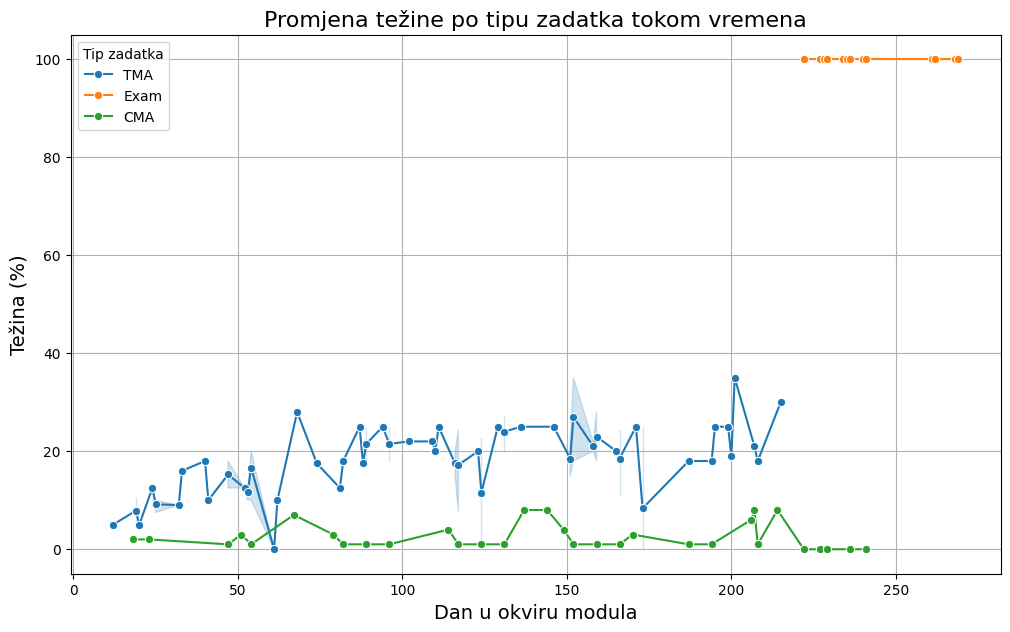

In [48]:

plt.figure(figsize=(12, 7))
sns.lineplot(x='date', y='weight', hue='assessment_type', data=A, marker='o')
plt.title('Promjena težine po tipu zadatka tokom vremena', fontsize=16)
plt.xlabel('Dan u okviru modula', fontsize=14)
plt.ylabel('Težina (%)', fontsize=14)
plt.legend(title='Tip zadatka')
plt.grid(True)

plt.show()

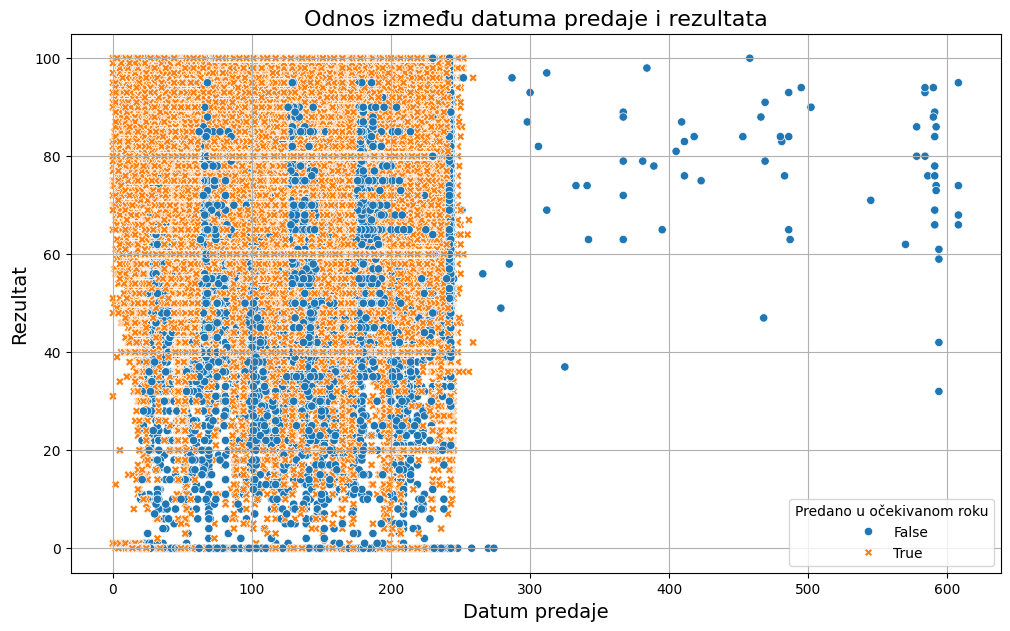

In [49]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='date_submitted', y='score', hue='is_within_expected_date', style='is_within_expected_date', data=C)
plt.title('Odnos između datuma predaje i rezultata', fontsize=16)
plt.xlabel('Datum predaje', fontsize=14)
plt.ylabel('Rezultat', fontsize=14)
plt.legend(title='Predano u očekivanom roku')
plt.grid(True)

plt.show()

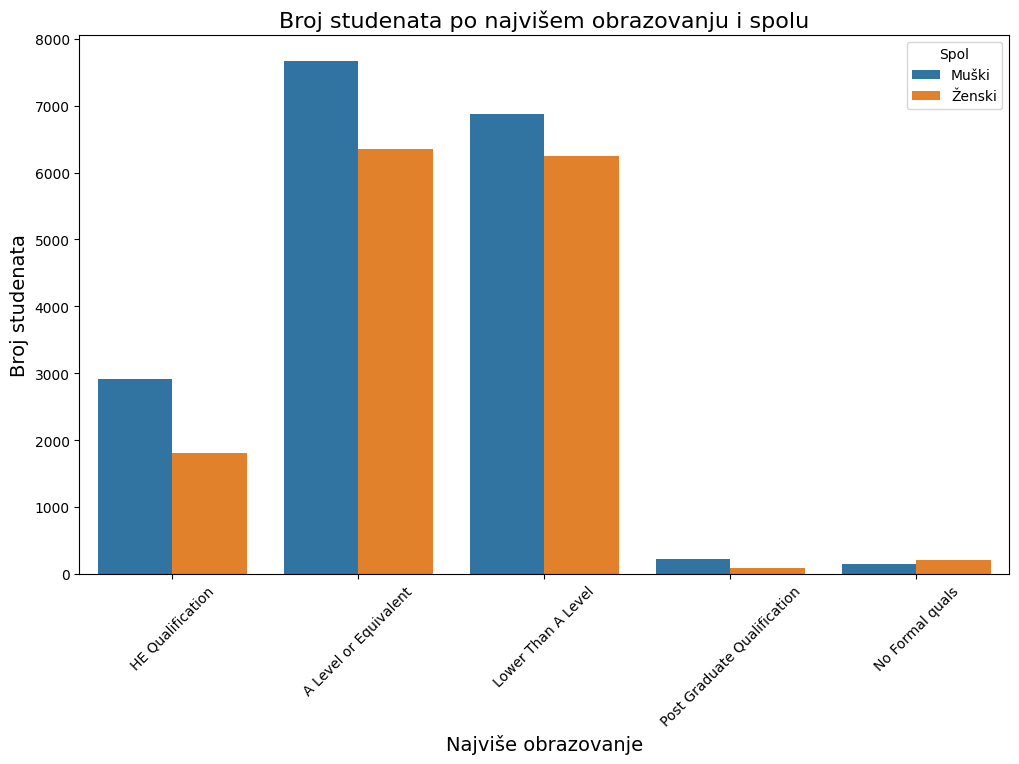

In [50]:
plt.figure(figsize=(12, 7))
sns.countplot(x='highest_education', hue='gender', data=D)
plt.title('Broj studenata po najvišem obrazovanju i spolu', fontsize=16)
plt.xlabel('Najviše obrazovanje', fontsize=14)
plt.ylabel('Broj studenata', fontsize=14)
plt.xticks(rotation=45) 
plt.legend(title='Spol', labels=['Muški', 'Ženski']) 

plt.show()

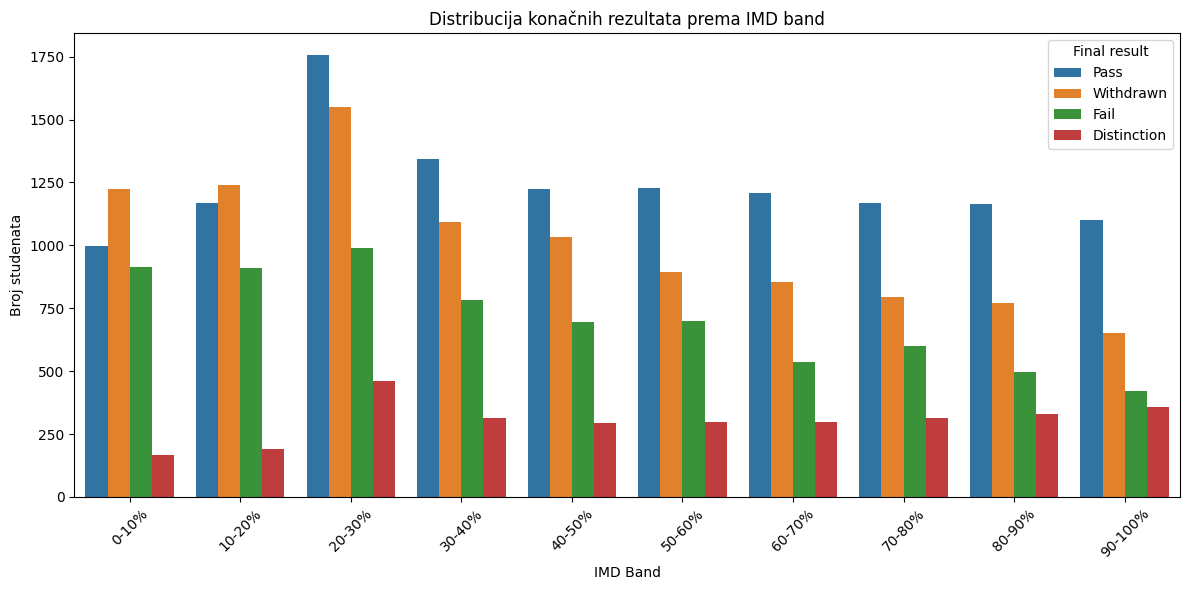

In [51]:
ordered_imd_bands = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]
D['imd_band'] = pd.Categorical(D['imd_band'], categories=ordered_imd_bands, ordered=True)

plt.figure(figsize=(12, 6))
sns.countplot(x='imd_band', hue='final_result', data=D)
plt.title('Distribucija konačnih rezultata prema IMD band')
plt.xlabel('IMD Band')
plt.ylabel('Broj studenata')
plt.xticks(rotation=45)
plt.legend(title='Final result')
plt.tight_layout()
plt.show()

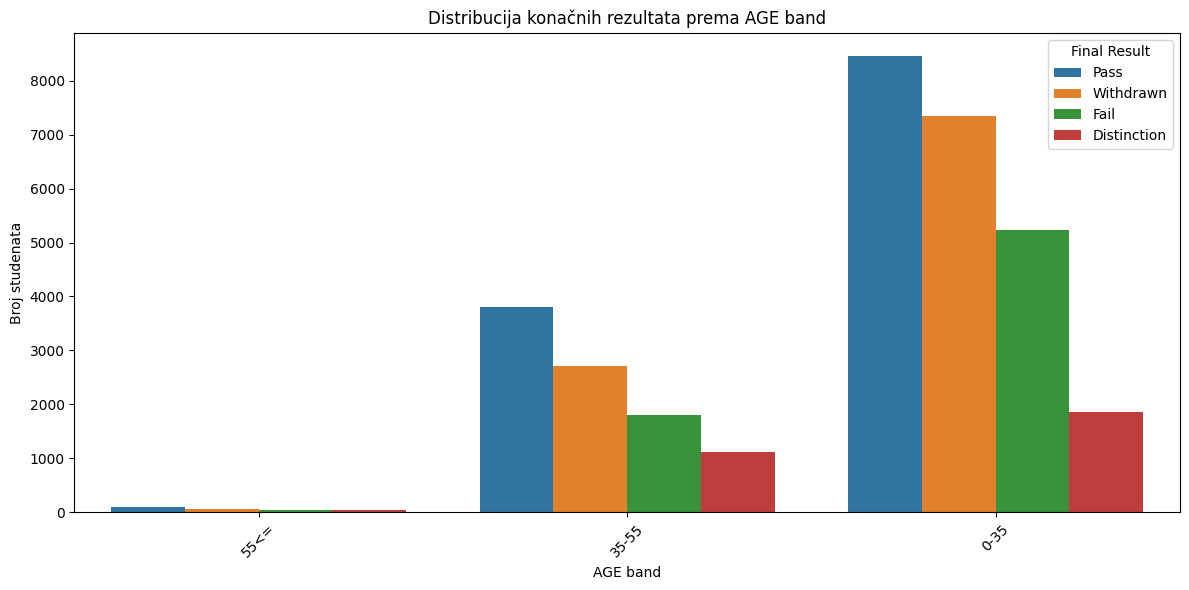

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age_band', hue='final_result', data=D)
plt.title('Distribucija konačnih rezultata prema AGE band')
plt.xlabel('AGE band')
plt.ylabel('Broj studenata')
plt.xticks(rotation=45)
plt.legend(title='Final Result')
plt.tight_layout()
plt.show()

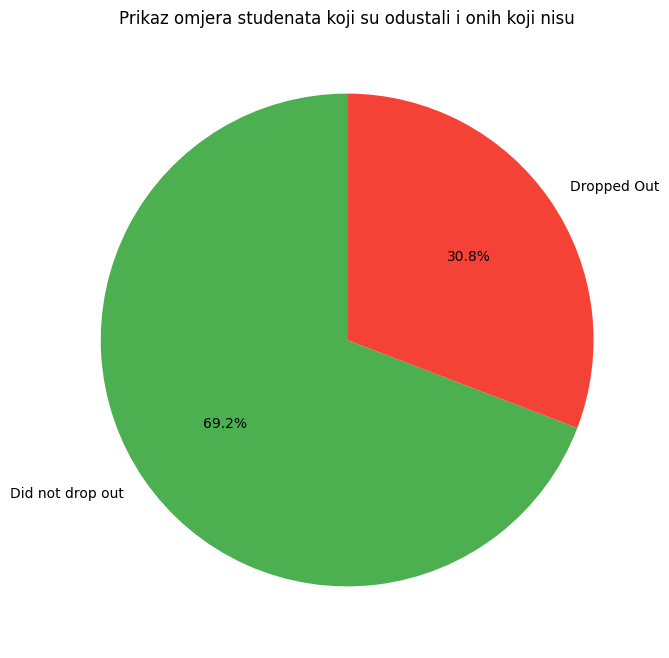

In [53]:
dropout_summary = E['dropped_out'].value_counts().rename(index={True: 'Dropped Out', False: 'Did not drop out'})

plt.figure(figsize=(8, 8))
dropout_summary.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Prikaz omjera studenata koji su odustali i onih koji nisu')
plt.ylabel('') 
plt.show()

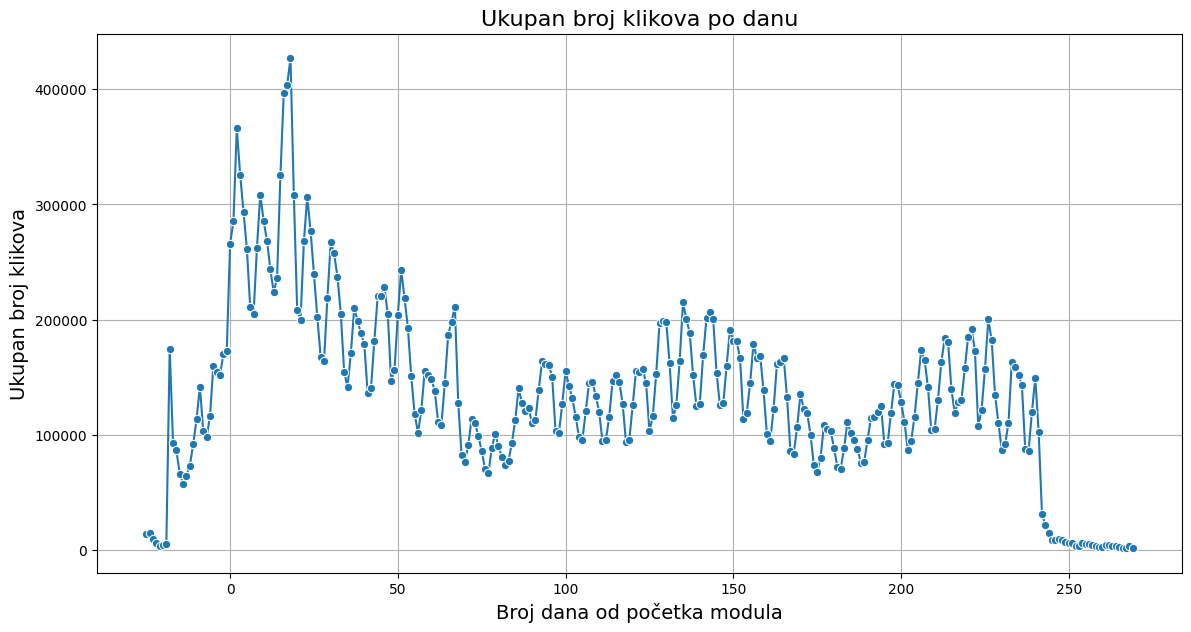

In [54]:
date_clicks = F.groupby('date')['sum_click'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='sum_click', data=date_clicks, marker='o')
plt.title('Ukupan broj klikova po danu', fontsize=16)
plt.xlabel('Broj dana od početka modula', fontsize=14)
plt.ylabel('Ukupan broj klikova', fontsize=14)
plt.grid(True)

plt.show()

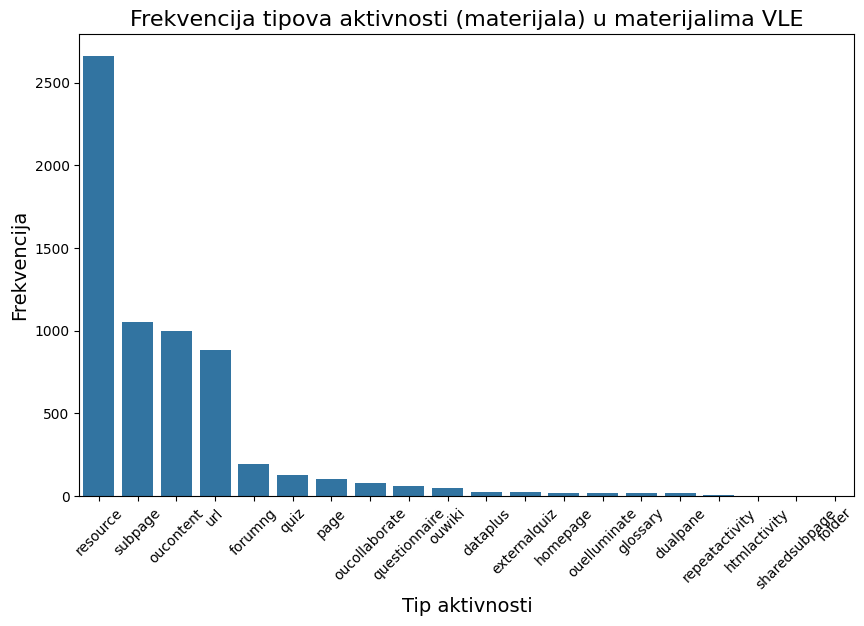

In [55]:
activity_counts = G['activity_type'].value_counts().reset_index()
activity_counts.columns = ['activity_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='activity_type', y='count', data=activity_counts)
plt.title('Frekvencija tipova aktivnosti (materijala) u materijalima VLE', fontsize=16)
plt.xlabel('Tip aktivnosti', fontsize=14)
plt.ylabel('Frekvencija', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [60]:
from scipy.stats import chi2_contingency
#Gender
# Kreiranje kontingencijske tablice
contingency_table = pd.crosstab(D['gender'], D['final_result'])

# Provedba Pearson chi-square testa
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"P-vrijednost: {p}") 
#p = 1% < 5% (varijable su nerelevantno malo povezane, tj ne postoji velika korelacija izmedu njih)

P-vrijednost: 0.0010347910807713464


In [65]:
#Education level
contingency_table = pd.crosstab(D['highest_education'], D['final_result'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-vrijednost: {p}") 
#p je izuzetno mala vrijednost (< 5%)

P-vrijednost: 2.0885963928038098e-211


In [66]:
contingency_table = pd.crosstab(D['age_band'], D['final_result'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-vrijednost: {p}") 
#p je izuzetno mala vrijednost (< 5%)

P-vrijednost: 1.6614522726352977e-45


In [68]:
contingency_table = pd.crosstab(D['disability'], D['final_result'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-vrijednost: {p}")
#p je izuzetno mala vrijednost (< 5%) 

P-vrijednost: 2.2088632525376935e-30


In [74]:
#buduci da se pearsonov korelacijski test primjenjuje samo na kontinuirane/numericke varijable morat cemo prvo pretvoriti kategoricke varijable u numericke
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

D['gender_encoded'] = label_encoder.fit_transform(D['gender'])
D['highest_education_encoded'] = label_encoder.fit_transform(D['highest_education'])
D['age_band_encoded'] = label_encoder.fit_transform(D['age_band'])
D['disability_encoded'] = label_encoder.fit_transform(D['disability'])

def parse_imd_band(imd_str):
    if pd.isna(imd_str) or '%' not in imd_str:
        return None
    imd_str = imd_str.replace('%', '')
    low, high = map(int, imd_str.split('-'))
    return (low + high) / 2

D['imd_band'] = D['imd_band'].apply(parse_imd_band)


In [78]:
student_assessment_avg = C.groupby('id_student')['score'].mean().reset_index()
student_vle_total = F.groupby('id_student')['sum_click'].sum().reset_index()

#Spajanje podataka
merged_data = D.merge(student_assessment_avg, on='id_student', how='left')
merged_data = merged_data.merge(student_vle_total, on='id_student', how='left')
merged_data = merged_data.merge(E[['id_student', 'date_registration']], on='id_student', how='left')
numeric_data = merged_data.select_dtypes(include=[np.number])

#Izracunavanje pearsonove korelacije za numericke varijable i kodirane kategoricke varijable
correlation_matrix = numeric_data.corr(method='pearson')
print(correlation_matrix)

                           id_student  num_of_prev_attempts  studied_credits  \
id_student                       1.00                  0.02            -0.00   
num_of_prev_attempts             0.02                  1.00             0.17   
studied_credits                 -0.00                  0.17             1.00   
gender_encoded                   0.00                 -0.03             0.01   
highest_education_encoded       -0.00                  0.03            -0.02   
age_band_encoded                 0.20                  0.02            -0.07   
disability_encoded               0.01                  0.07             0.06   
score                            0.02                 -0.10            -0.08   
sum_click                        0.03                 -0.06            -0.02   
date_registration                0.01                 -0.03            -0.09   

                           gender_encoded  highest_education_encoded  \
id_student                           0.00      